In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

* titanic_train.csv 파일 불러오기

In [2]:
data=pd.read_csv("C:\\Users\\1-10\\Desktop\\python\\04_Titanic\\titanic_train.csv")

* head를 이용해서 앞의 데이터가 제대로 들어왔는지 확인. 특히 index가 제대로 생성이 되었는지를 중심으로 확인

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### pandas의 fillna 기능을 이용하여 평균값, 일정한 값으로 채우도록 할 예정임
* Age : 평균으로 채울 예정
* Cabin/Embarked : N이라는 새로운 문자로 설정

In [6]:
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Cabin"].fillna("N",inplace=True)
data["Embarked"].fillna("N", inplace=True)

#### 카테고리 변수형의 값들 확인 -> value_counts()

In [7]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [9]:
data['Cabin'].value_counts()

N              687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
A32              1
C104             1
C101             1
C111             1
E10              1
Name: Cabin, Length: 148, dtype: int64

### 전처리 : 인코딩, 정규화 등

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [11]:
def encode_feature(df):
    # 변경할 컬럼 리스트
    features=["Cabin","Sex","Embarked"]
    for feature in features:
        # 각기 컬럼별로 수행할 인코더 설정 -> 컬럼 별로 다르게 되니 매 for마다 새로운 것이 
        le=preprocessing.LabelEncoder()
        # 인코딩할 컬럼 설정 및 그에 맞는 학습 수행 -> fit
        le=le.fit(df.loc[:,feature])
        # 실제 학습한 내용을 적용 -> transform
        df.loc[:,feature]=le.transform(df.loc[:,feature])
        
    return df

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [13]:
data=encode_feature(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


In [14]:
data.info() # sex, cabin, embarked가 int형으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int32
Embarked       891 non-null int32
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


#### null 데이터 처리 함수 -> 앞에서 처리한 부분을 함수로 묶어서 두려는 것임
##### 단) Fare도 0으로 변경하는 부분 추가

In [15]:
def titanic_fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

#### 불필요한 컬럼 제거

In [16]:
def drop_feature(df):
    df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
    return df

#### 인코딩

In [17]:
def format_features(df):
    # 1번 부분
    # Cabin에서 필ㄹ요 정보 변형 부분
    df.loc[:,"Cabin"]=df.loc[:,"Cabin"].apply(lambda x:str(x)[:1])
    
    # 2번 부분
    # 변경할 컬럼 리스트
    features=["Cabin","Sex","Embarked"]
    for feature in features:
        # 각기 컬럼별로 수행할 인코더 설정 -> 컬럼 별로 다르게 되니 매 for마다 새로운 것이 
        le=preprocessing.LabelEncoder()
        # 인코딩할 컬럼 설정 및 그에 맞는 학습 수행 -> fit
        le=le.fit(df.loc[:,feature])
        # 실제 학습한 내용을 적용 -> transform
        df.loc[:,feature]=le.transform(df.loc[:,feature])
        
    return df

#### 위의 전처리들을 하나의 함수로 다시 묶는 부분

In [18]:
def titanic_transform(df):
    df=titanic_fillna(df)
    df=drop_feature(df)
    df=format_features(df)
    return df

#### 다시 처음부터 데이터를 불러오고 위의 작업을 일괄적용

In [19]:
data_train=pd.read_csv("C:\\Users\\1-10\\Desktop\\python\\04_Titanic\\titanic_train.csv")

In [20]:
y_titanic_train=data_train.loc[:,"Survived"]
X_titanic_train=data_train.drop("Survived",axis=1)

In [21]:
X_titanic_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
X_titanic_train=titanic_transform(X_titanic_train)
X_titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


#### 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split

##### 그냥 분리

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic_train,y_titanic_train,test_size=0.2, random_state=11)

##### train set의 비율 확인

In [25]:
y_titanic_train.value_counts()/len(y_titanic_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [26]:
y_train.value_counts()/len(y_train)

0    0.605337
1    0.394663
Name: Survived, dtype: float64

In [27]:
y_test.value_counts()/len(y_test)

0    0.659218
1    0.340782
Name: Survived, dtype: float64

#### 비율 유지하는 stratify 사용 -> 특히 불균형 데이터의 경우
##### 사용법 : stratify 옵션을 사용할 것

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic_train,y_titanic_train,stratify=y_titanic_train,test_size=0.2, random_state=11)

#### 분류 모델 : 여러가지가 있으나, 기본적인 logistic regression, decision tree, 앙상블의 randomforest

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 평가용
from sklearn.metrics import accuracy_score

#### knn으로 간단히 확인

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [32]:
knn=KNeighborsClassifier()

In [33]:
scores=cross_val_score(knn,X_train,y_train,cv=5)
for iter_count, accuracy in enumerate(scores):
    print("knn 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("--------------------------------------------------------------------")
print("knn 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))

knn 교차 검증 0 & 정확도 0.7413
knn 교차 검증 1 & 정확도 0.6853
knn 교차 검증 2 & 정확도 0.7483
knn 교차 검증 3 & 정확도 0.7676
knn 교차 검증 4 & 정확도 0.7376
--------------------------------------------------------------------
knn 교차 검증 평균 정확도 : 0.7360


In [34]:
parameters={"n_neighbors":[1,3,5,7], "weights":["uniform"]}

In [35]:
n_iter_search=10
knn_rgs=RandomizedSearchCV(knn, param_distributions=parameters,cv=7,scoring='accuracy',n_jobs=-1,
                          verbose=1,random_state=1234,n_iter=n_iter_search)
knn_rgs.fit(X_train,y_train)

Fitting 7 folds for each of 4 candidates, totalling 28 fits


C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [36]:
knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
# 위의 결과, 5 주변에서 찾아야하므로 gridsearch 이용
parameters={"n_neighbors":[3,5,7], "weights":["uniform"]}

In [38]:
grid_knn_clf=GridSearchCV(knn, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)

In [39]:
grid_knn_clf.fit(X_train,y_train)

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [40]:
grid_knn_clf.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [41]:
grid_knn_clf.best_score_

0.7359550561797753

In [42]:
knn_best=grid_knn_clf.best_estimator_

knn_predictions=knn_best.predict(X_test)
accuracy=accuracy_score(y_test,knn_predictions)
print("knn에서 GridSearchCV로 찾은 결과:{0:.4f}".format(accuracy))

knn에서 GridSearchCV로 찾은 결과:0.7318


#### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [57]:
RF=RandomForestClassifier()

In [58]:
scores=cross_val_score(RF,X_train,y_train,cv=5)

for iter_count, accuracy in enumerate(scores):
    print("RF 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("--------------------------------------------------------------------")
print("RF 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))

RF 교차 검증 0 & 정확도 0.7972
RF 교차 검증 1 & 정확도 0.7692
RF 교차 검증 2 & 정확도 0.8252
RF 교차 검증 3 & 정확도 0.8099
RF 교차 검증 4 & 정확도 0.8085
--------------------------------------------------------------------
RF 교차 검증 평균 정확도 : 0.8020


C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

In [70]:
parameters={"n_estimators":[100,150,200,250], "criterion" :['gini']}
 
n_iter_search=10
RF_rgs=RandomizedSearchCV(RF, param_distributions=parameters,cv=7,scoring='accuracy',n_jobs=-1,
                          verbose=1,random_state=1234,n_iter=n_iter_search)

In [71]:
RF_rgs.fit(X_train,y_train)

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.7s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [72]:
RF_rgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
# 위의 결과, 150 주변에서 찾아야하므로 gridsearch 이용
parameters={"n_estimators":[130,140,160], "criterion":["gini"]}

In [77]:
grid_RF_clf=GridSearchCV(RF, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)

In [78]:
grid_RF_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [79]:
grid_RF_clf.best_params_

{'criterion': 'gini', 'n_estimators': 140}

In [80]:
grid_RF_clf.best_score_

0.8089887640449438

In [81]:
RF_best=grid_RF_clf.best_estimator_

In [82]:
RF_predictions=RF_best.predict(X_test)
accuracy=accuracy_score(y_test,RF_predictions)
print("RF에서 GridSearchCV로 찾은 결과:{0:.4f}".format(accuracy))

RF에서 GridSearchCV로 찾은 결과:0.8268


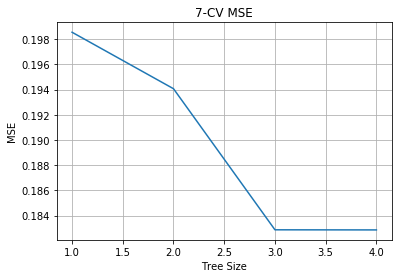

#### SVM

In [83]:
from sklearn.svm import SVC
from sklearn import metrics

In [85]:
svc=SVC()

In [86]:
scores=cross_val_score(svc, X_train, y_train, cv=7)

for iter_count, accuracy in enumerate(scores):
    print("SVM 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("--------------------------------------------------------------------")
print("SVM 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))
    

SVM 교차 검증 0 & 정확도 0.7255
SVM 교차 검증 1 & 정확도 0.6373
SVM 교차 검증 2 & 정확도 0.6765
SVM 교차 검증 3 & 정확도 0.6961
SVM 교차 검증 4 & 정확도 0.7549
SVM 교차 검증 5 & 정확도 0.7327
SVM 교차 검증 6 & 정확도 0.7525
--------------------------------------------------------------------
SVM 교차 검증 평균 정확도 : 0.7108


C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1

In [ ]:
parameters={"n_estimators":[100,150,200,250], "criterion" :['gini']}

n_iter_search=10
RF_rgs=RandomizedSearchCV(RF, param_distributions=parameters,cv=7,scoring='accuracy',n_jobs=-1,
                          verbose=1,random_state=1234,n_iter=n_iter_search)

In [46]:
import xgboost as xgb
from xgboost import XGBClassifier

In [47]:
XGBC=XGBClassifier(verbosity=2,n_jobs=-1)

xgc_param_grid={
    'n_estimators':[10,30,50],
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
n_iter_search=10
xgb_rgs=RandomizedSearchCV(XGBC, param_distributions=xgc_param_grid, cv=7,scoring='accuracy',
                          n_jobs=-1,verbose=1,random_state=1234,n_iter=n_iter_search)
xgb_rgs.fit(X_train,y_train)

xgb_rgs_best=xgb_rgs.best_estimator_
print(xgb_rgs_best)

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


Fitting 7 folds for each of 3 candidates, totalling 21 fits
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:14:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_dept

In [50]:
from lightgbm import LGBMClassifier

In [53]:
LGB=LGBMClassifier(random_state=1234, n_jobs=-1)

lb_param_grid={
    # the number of trees in the forest
    # 참고) 지금 20에서는 10이 기본, 22 버전에서는 100으로 변경 예정
    "n_estimators":[100,200,300],
    "learning_rate":[0.1,0.05,0.01],
    #"max_depth":[-1],
    #"min_child_weight":[13],
    #"colsample_bytree":[0.1,0.5,0.8,0.65,0.66,0.7,0.75,0.77,0.79],
    #"num_leaves":[6,8,12,16,20,24],
    #"reg_lambda":[1,1.2,1.4,2,10],
    #"reg_alpha":[1,1.2,0.5],
    #"subsample":[0.7,0.75,0.8,0.8,1.0]
}

In [55]:
evals=[(X_test, y_test)]
LGB.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.623072
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.588646
[3]	valid_0's binary_logloss: 0.559973
[4]	valid_0's binary_logloss: 0.535705
[5]	valid_0's binary_logloss: 0.51338
[6]	valid_0's binary_logloss: 0.494402
[7]	valid_0's binary_logloss: 0.479332
[8]	valid_0's binary_logloss: 0.465036
[9]	valid_0's binary_logloss: 0.453501
[10]	valid_0's binary_logloss: 0.441638
[11]	valid_0's binary_logloss: 0.433783
[12]	valid_0's binary_logloss: 0.42727
[13]	valid_0's binary_logloss: 0.418059
[14]	valid_0's binary_logloss: 0.411131
[15]	valid_0's binary_logloss: 0.405336
[16]	valid_0's binary_logloss: 0.398094
[17]	valid_0's binary_logloss: 0.394039
[18]	valid_0's binary_logloss: 0.389716
[19]	valid_0's binary_logloss: 0.386753
[20]	valid_0's binary_logloss: 0.384687
[21]	valid_0's binary_logloss: 0.38233
[22]	valid_0's binary_logloss: 0.381079
[23]	valid_0's binary_logloss: 0.380685
[24]	valid_0's binary_logloss:

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)